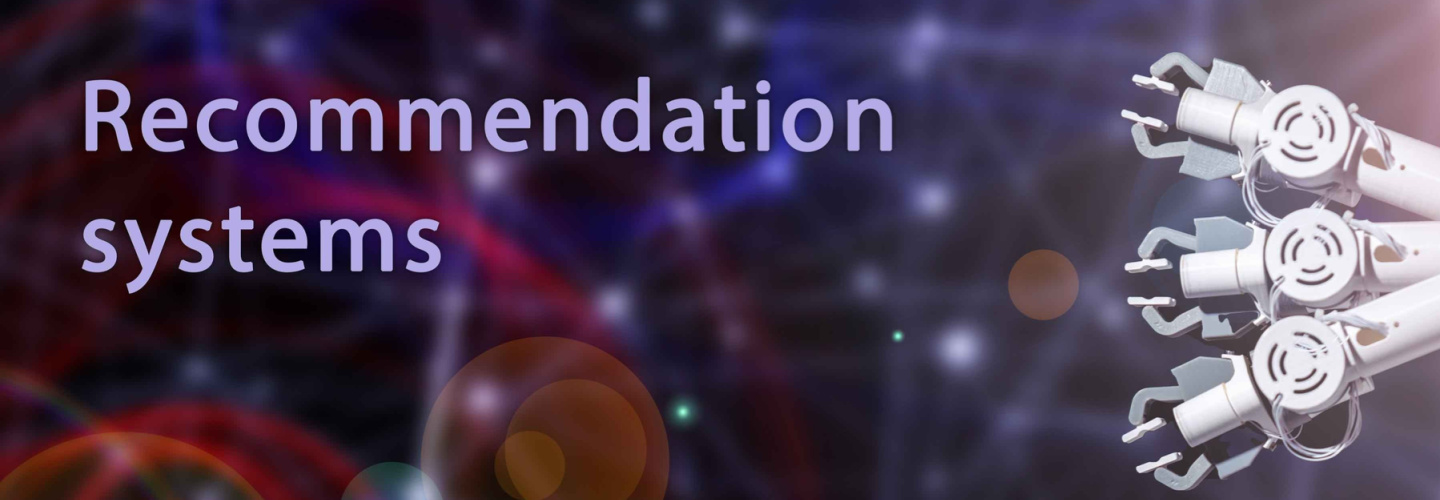

In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import neattext.functions as nfx
import seaborn as sns 
from   sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from   sklearn.metrics.pairwise import cosine_similarity
import string
import re
from   nltk.corpus import stopwords
import nltk
from   nltk.stem import WordNetLemmatizer

In [12]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("udemy_course_data.csv")
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [4]:
data.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,104000,2016-06-14,17:36:46Z,2016,6,14
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,7650,2017-03-10,22:24:30Z,2017,3,10
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,20520,2015-12-30,16:41:42Z,2015,12,30
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,15000,2016-08-11,19:06:15Z,2016,8,11
3682,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2 hours,2014-09-28T19:51:11Z,Web Development,40545,2014-09-28,19:51:11Z,2014,9,28


In [5]:
data.shape

(3683, 18)

In [6]:
data.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         1
year                   0
month                  0
day                    0
dtype: int64

In [7]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         1
year                   0
month                  0
day                    0
dtype: int64

In [8]:
data.course_title[1:10]

1    Complete GST Course & Certification - Grow You...
2    Financial Modeling for Business Analysts and C...
3    Beginner to Pro - Financial Analysis in Excel ...
4         How To Maximize Your Profits Trading Options
5    Trading Penny Stocks: A Guide for All Levels I...
6    Investing And Trading For Beginners: Mastering...
7    Trading Stock Chart Patterns For Immediate, Ex...
8    Options Trading 3 : Advanced Stock Profit and ...
9    The Only Investment Strategy You Need For Your...
Name: course_title, dtype: object

# retrait des caractères spéciaux 

In [9]:
#data["titre_OK"]= data.course_title.apply(nfx.remove_stopwords)
#data["titre_OK"]= data.course_title.apply(nfx.remove_special_characters)

In [60]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


NameError: name 'WordNetLemmatizer' is not defined

In [67]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [70]:
def preprocess_text(text):
    # Lower case
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whithespace
    text = re.sub("\s+", " ", text).strip()
    
    # Tokenisation
    words = text.split()
    
    # Remove stop words
    words = [word for word in words if (word not in stop_words)]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Reconstruct the text
    text = " ".join(words)
                  
    # Final result
    return(text) 

In [71]:
data["titre_OK"] = data["course_title"].apply(preprocess_text)

In [72]:
data.titre_OK[0:10]

0                   ultimate investment banking course
1    complete gst course certification grow ca prac...
2       financial modeling business analyst consultant
3                beginner pro financial analysis excel
4                       maximize profit trading option
5                      trading penny stock guide level
6     investing trading beginner mastering price chart
7    trading stock chart pattern immediate explosiv...
8    option trading advanced stock profit success m...
9                  investment strategy need retirement
Name: titre_OK, dtype: object

# Vectorisation du texte
* le nom des cours en lignes et les occurences en colonne 

In [73]:
countVec = CountVectorizer()
cv = countVec.fit_transform(data.titre_OK)

In [74]:
cv.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Dataframe  du countvectorizer et les cours encodé

In [78]:
cv_df =pd.DataFrame(cv.todense())
#, columns=countVec.get_feature_names())

In [80]:
cv_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# alogrithme des similarités cosinus
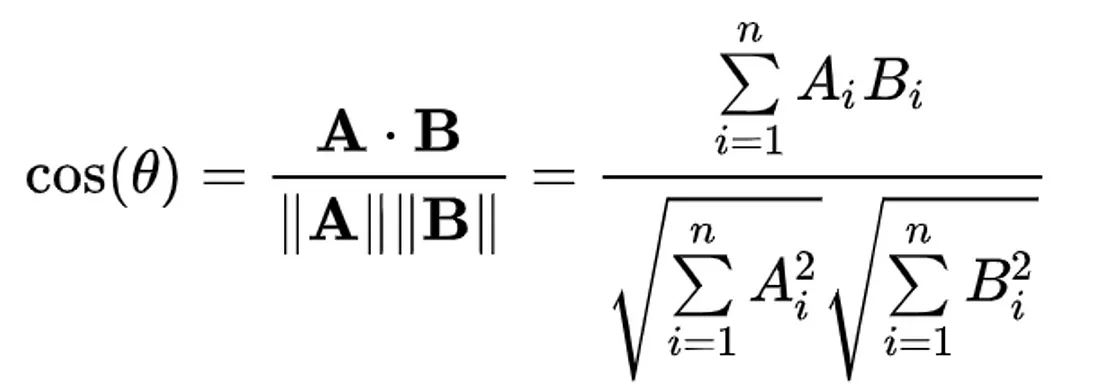

on a besoin de deux vector A et B sur lesquels on applique la formule suscité.

la diagonale de la matrice des cosinus est toujours égale à 1


In [81]:
matrice_cosine= cosine_similarity(cv)

In [82]:
matrice_cosine

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18898224, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.37796447],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.15430335],
       [0.        , 0.        , 0.        , ..., 0.37796447, 0.15430335,
        1.        ]])

In [88]:
index_cours= pd.Series(data.index, index=data.course_title).drop_duplicates()
print(index_cours)

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64


# Recommandation à partir d'un mot clé
* cas du mot clé JAVA

In [85]:
course_dict = dict(index_cours)


course_keys = list(course_dict.keys())

touse = {}
counter = 0
keyword = 'Java'
for key,value in course_dict.items():
    if keyword in key:
        touse[counter] = key
        
    counter+=1
    
touse

{2473: 'Learning Dynamic Website Design - PHP MySQL and JavaScript',
 2484: 'Learn JavaScript for beginners',
 2498: 'Accelerated JavaScript Training',
 2506: 'Advanced Javascript',
 2515: 'Start Writing JavaScript Today - Beginner JavaScript Course',
 2520: 'Javascript ES6! A Complete Reference Guide to Javascript ES6',
 2526: 'Javascript Intermediate level 2 - Mastering Functions',
 2530: 'Learn JavaScript for Web Development',
 2536: 'Javascript Intermediate level 3 - JSON',
 2539: 'JavaScript DOM Dynamic Web interactive content Boot Camp',
 2540: 'Master JavaScript Programming, 3 Projects Included !!',
 2548: 'Dynamic JavaScript Master Class AJAX JSON Simple APIs',
 2551: 'JavaScript the Basics - JavaScript for Beginners',
 2552: 'Complete E-Commerce Course - Java,Spring,Hibernate and MySQL',
 2553: 'Learn SVG Animation - With HTML, CSS & Javascript',
 2580: 'JavaScript For Absolute Beginners - Level One',
 2593: 'Master ExpressJS to Build Web Apps with NodeJS&JavaScript',
 2612: '

In [86]:
temp = data[data["course_title"].str.contains("Python")]
temp.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,titre_OK
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7 hours,2017-04-28T16:41:44Z,Business Finance,58800,2017-04-28,16:41:44Z,2017,4,28,python algo trading sentiment trading news
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5 hours,2017-05-28T23:41:03Z,Business Finance,110675,2017-05-28,23:41:03Z,2017,5,28,python algo stock trading automate trading
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5 hours,2017-03-30T22:17:09Z,Business Finance,743145,2017-03-30,22:17:09Z,2017,3,30,python finance investment fundamental data ana...
149,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3 hours,2017-03-14T00:39:45Z,Business Finance,90600,2017-03-14,00:39:45Z,2017,3,14,python algo trading fx trading oanda
336,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8 hours,2016-04-12T00:40:03Z,Business Finance,20450,2016-04-12,00:40:03Z,2016,4,12,stock technical analysis python


In [25]:
top6 = temp.sort_values(by = 'num_subscribers',ascending=False).head(6)

top6

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,titre_OK
2502,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4 hours,2012-04-25T00:01:43Z,Web Development,1763350,2012-04-25,00:01:43Z,2012,4,25,Web Programming with Python
2575,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45 hours,2013-04-08T00:46:14Z,Web Development,4565340,2013-04-08,00:46:14Z,2013,4,8,Coding for Entrepreneurs Learn Python Django a...
2533,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09T15:37:56Z,Web Development,1239980,2015-02-09,15:37:56Z,2015,2,9,Learn Python and Django Payment Processing
3205,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5 hours,2017-02-24T18:40:55Z,Web Development,2366400,2017-02-24,18:40:55Z,2017,2,24,Python and Django Full Stack Web Developer Boo...
3512,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2 hours,2015-06-09T19:51:50Z,Web Development,0,2015-06-09,19:51:50Z,2015,6,9,Fun and creative web engineering with Python a...
2558,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11 hours,2016-09-26T15:08:29Z,Web Development,1526265,2016-09-26,15:08:29Z,2016,9,26,The Complete Ethical Hacking Course 20 Python ...


# Essai de recommendation en fonction du contenu

soit le titre `Web Programming with Python` essai d'une recommendation de cours similaire

In [100]:
index = index_cours["Web Programming with Python"]
#score / probabilité de chaque cours de figurer dans la liste 
scores= list(enumerate(matrice_cosine[index]))

In [90]:
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.2041241452319315),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.2041241452319315),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.2357022603955159),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80,

# Tri des Scores dans l'ordre croissant 

In [101]:
tri_cours= sorted(scores, key=lambda c:c[1], reverse=True)

In [102]:
tri_cours

[(2502, 1.0000000000000002),
 (3348, 1.0000000000000002),
 (3143, 0.6666666666666669),
 (2686, 0.6123724356957945),
 (3338, 0.5773502691896258),
 (2864, 0.5163977794943223),
 (3244, 0.5163977794943223),
 (2712, 0.4714045207910318),
 (2857, 0.4714045207910318),
 (3138, 0.4714045207910318),
 (3165, 0.4714045207910318),
 (3397, 0.4714045207910318),
 (3512, 0.4714045207910318),
 (2512, 0.4364357804719848),
 (3205, 0.4364357804719848),
 (3289, 0.4364357804719848),
 (3331, 0.4364357804719848),
 (3023, 0.408248290463863),
 (2594, 0.3849001794597505),
 (3601, 0.3849001794597505),
 (2500, 0.3651483716701108),
 (2651, 0.3651483716701108),
 (538, 0.3333333333333334),
 (2612, 0.3333333333333334),
 (2665, 0.3333333333333334),
 (2927, 0.3333333333333334),
 (2965, 0.3333333333333334),
 (3076, 0.3333333333333334),
 (3200, 0.3333333333333334),
 (3235, 0.3333333333333334),
 (3281, 0.3333333333333334),
 (336, 0.2886751345948129),
 (764, 0.2886751345948129),
 (866, 0.2886751345948129),
 (1500, 0.288675134

In [103]:
data.iloc[3143]

course_id                                                         631128
course_title           Complete Python Web Course: Build 8 Python Web...
url                    https://www.udemy.com/the-complete-python-web-...
is_paid                                                             True
price                                                                110
num_subscribers                                                     7489
num_reviews                                                          941
num_lectures                                                         173
level                                                         All Levels
content_duration                                                16 hours
published_timestamp                                 2015-11-08T20:57:35Z
subject                                                  Web Development
profit                                                            823790
published_date                                     

In [104]:

sorted_indices = [i[0] for i in tri_cours[1:]]

sorted_values = [i[1] for i in tri_cours[1:]]

sorted_values

[1.0000000000000002,
 0.6666666666666669,
 0.6123724356957945,
 0.5773502691896258,
 0.5163977794943223,
 0.5163977794943223,
 0.4714045207910318,
 0.4714045207910318,
 0.4714045207910318,
 0.4714045207910318,
 0.4714045207910318,
 0.4714045207910318,
 0.4364357804719848,
 0.4364357804719848,
 0.4364357804719848,
 0.4364357804719848,
 0.408248290463863,
 0.3849001794597505,
 0.3849001794597505,
 0.3651483716701108,
 0.3651483716701108,
 0.3333333333333334,
 0.3333333333333334,
 0.3333333333333334,
 0.3333333333333334,
 0.3333333333333334,
 0.3333333333333334,
 0.3333333333333334,
 0.3333333333333334,
 0.3333333333333334,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.2886751345948129,
 0.28867513459

In [106]:
resultats = data.iloc[sorted_indices]
resultats

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,titre_OK
3348,523312,Python Web Programming,https://www.udemy.com/python-web-programming/,True,100,1020,46,60,Beginner Level,6 hours,2015-07-01T21:46:36Z,Web Development,102000,2015-07-01,21:46:36Z,2015,7,1,python web programming
3143,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16 hours,2015-11-08T20:57:35Z,Web Development,823790,2015-11-08,20:57:35Z,2015,11,8,complete python web course build python web apps
2686,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5 hours,2015-06-14T18:18:57Z,Web Development,922950,2015-06-14,18:18:57Z,2015,6,14,python beginner python programming language tu...
3338,1038538,Introduction to QGIS Python Programming,https://www.udemy.com/introduction-to-qgis-pyt...,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22T00:11:22Z,Web Development,16745,2016-12-22,00:11:22Z,2016,12,22,introduction qgis python programming
2864,1004008,Introduction to web programming for GIS applic...,https://www.udemy.com/introduction-to-web-prog...,True,100,205,38,97,Beginner Level,13.5 hours,2017-03-13T14:50:48Z,Web Development,20500,2017-03-13,14:50:48Z,2017,3,13,introduction web programming gi application
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,104000,2016-06-14,17:36:46Z,2016,6,14,learn jquery scratch master javascript library
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,7650,2017-03-10,22:24:30Z,2017,3,10,design wordpress website coding
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,20520,2015-12-30,16:41:42Z,2015,12,30,learn build using polymer
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,15000,2016-08-11,19:06:15Z,2016,8,11,cs animation create amazing effect website


In [107]:
resultats['Similarity_Score'] = np.array(sorted_values)

resultats

C:\Users\DELL\AppData\Local\Temp/ipykernel_20252/1103493990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['Similarity_Score'] = np.array(sorted_values)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,titre_OK,Similarity_Score
3348,523312,Python Web Programming,https://www.udemy.com/python-web-programming/,True,100,1020,46,60,Beginner Level,6 hours,2015-07-01T21:46:36Z,Web Development,102000,2015-07-01,21:46:36Z,2015,7,1,python web programming,1.000000
3143,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16 hours,2015-11-08T20:57:35Z,Web Development,823790,2015-11-08,20:57:35Z,2015,11,8,complete python web course build python web apps,0.666667
2686,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5 hours,2015-06-14T18:18:57Z,Web Development,922950,2015-06-14,18:18:57Z,2015,6,14,python beginner python programming language tu...,0.612372
3338,1038538,Introduction to QGIS Python Programming,https://www.udemy.com/introduction-to-qgis-pyt...,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22T00:11:22Z,Web Development,16745,2016-12-22,00:11:22Z,2016,12,22,introduction qgis python programming,0.577350
2864,1004008,Introduction to web programming for GIS applic...,https://www.udemy.com/introduction-to-web-prog...,True,100,205,38,97,Beginner Level,13.5 hours,2017-03-13T14:50:48Z,Web Development,20500,2017-03-13,14:50:48Z,2017,3,13,introduction web programming gi application,0.516398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,104000,2016-06-14,17:36:46Z,2016,6,14,learn jquery scratch master javascript library,0.000000
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,7650,2017-03-10,22:24:30Z,2017,3,10,design wordpress website coding,0.000000
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,20520,2015-12-30,16:41:42Z,2015,12,30,learn build using polymer,0.000000
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,15000,2016-08-11,19:06:15Z,2016,8,11,cs animation create amazing effect website,0.000000


# table des scores pour chaque cours 

certains ont de bonne probabilité de correspondre avec le cours recherché d'autres par contre non (0.0000)

In [108]:
use_df = resultats[['titre_OK','Similarity_Score']]
use_df

,titre_OK,Similarity_Score
3348,python web programming,1.000000
3143,complete python web course build python web apps,0.666667
2686,python beginner python programming language tu...,0.612372
3338,introduction qgis python programming,0.577350
2864,introduction web programming gi application,0.516398
...,...,...
3678,learn jquery scratch master javascript library,0.000000
3679,design wordpress website coding,0.000000
3680,learn build using polymer,0.000000
3681,cs animation create amazing effect website,0.000000


In [111]:
import warnings
warnings.filterwarnings("ignore")


def recommend_course(df, title, numrec = 10):
    
    course_index = pd.Series(
        df.index, index=df['course_title']).drop_duplicates()

    index = course_index[title]

    scores = list(enumerate(matrice_cosine [index]))

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    selected_course_index = [i[0] for i in sorted_scores[1:]]

    selected_course_score = [i[1] for i in sorted_scores[1:]]

    rec_df = df.iloc[selected_course_index]

    rec_df['Similarity_Score'] = selected_course_score

    final_recommended_courses = rec_df[[
        'course_title', 'Similarity_Score', 'url', 'price', 'num_subscribers']]

    return final_recommended_courses.head(numrec)

In [112]:
ans = recommend_course(df = data, title = "Web Programming with Python")
ans

,course_title,Similarity_Score,url,price,num_subscribers
3348,Python Web Programming,1.000000,https://www.udemy.com/python-web-programming/,100,1020
3143,Complete Python Web Course: Build 8 Python Web...,0.666667,https://www.udemy.com/the-complete-python-web-...,110,7489
2686,Python for Beginners: Python Programming Langu...,0.612372,https://www.udemy.com/python-course/,150,6153
3338,Introduction to QGIS Python Programming,0.577350,https://www.udemy.com/introduction-to-qgis-pyt...,85,197
2864,Introduction to web programming for GIS applic...,0.516398,https://www.udemy.com/introduction-to-web-prog...,100,205
3244,Web Programming Course : Asp.Net MVC,0.516398,https://www.udemy.com/mvc-course/,100,2760
2712,Back to School Web Development and Programming...,0.471405,https://www.udemy.com/back-to-school-web-devel...,200,18170
2857,The Complete TypeScript Programming Guide for ...,0.471405,https://www.udemy.com/typescript-programming/,40,236
3138,"Web Scraping with Python, Ruby & import. io",0.471405,https://www.udemy.com/web-scraping-with-python...,75,973
3165,Professional Python Web Development Using Flask,0.471405,https://www.udemy.com/python-flask-course/,120,3420


# Assemblage et préparation pour l'intégration dans l'application



In [20]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import neattext.functions as nfx
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")
data= pd.read_csv("udemy_course_data.csv")
data["titre_OK"]= data.course_title.apply(nfx.remove_stopwords)
data["titre_OK"]= data.course_title.apply(nfx.remove_special_characters)
countVec= CountVectorizer()
cv= countVec.fit_transform(data.titre_OK)
df=data
matrice_cosine= cosine_similarity(cv)
def recommend_course2(title, numrec=10):
    pattern = re.compile(re.escape(title), re.IGNORECASE)
    matching_courses = df['course_title'].apply(lambda x: bool(pattern.search(x)))
    
    if not matching_courses.any():
        return "No matching courses found."
    
    index = df[matching_courses].index[0]
    scores = list(enumerate(matrice_cosine[index]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    selected_course_index = [i[0] for i in sorted_scores[1:]]
    selected_course_score = [i[1] for i in sorted_scores[1:]]
    rec_df = df.iloc[selected_course_index]
    rec_df['Similarity_Score'] = selected_course_score

    final_recommended_courses = rec_df[[
        'course_title', 'Similarity_Score', 'url', 'price', 'num_subscribers']]

    return final_recommended_courses.head(numrec)


In [21]:
result=recommend_course2("node",100)
result


,course_title,Similarity_Score,url,price,num_subscribers
3256,Learn and Understand NodeJS,0.377964,https://www.udemy.com/understand-nodejs/,195,58208
3512,Fun and creative web engineering with Python a...,0.341882,https://www.udemy.com/web-engineering-with-pyt...,0,10917
3604,Login and Registration from Scratch with PHP a...,0.341882,https://www.udemy.com/authentication-from-scra...,20,1128
2694,Up and Running with jQuery,0.338062,https://www.udemy.com/up-and-running-with-jquery/,0,3324
2830,Learn Web Scraping with Node.js,0.338062,https://www.udemy.com/web-scraping-nodejs/,75,16731
...,...,...,...,...,...
992,Investments and Financial Markets,0.188982,https://www.udemy.com/investments-and-financia...,40,71
1009,6. Annuities Due and Deferred,0.188982,https://www.udemy.com/annuities-due-and-deferred/,20,170
1019,Bookkeeping Practicals with Software,0.188982,https://www.udemy.com/bookkeeping-practical-wi...,35,1
1085,"Depreciation, Amortization and Depletion",0.188982,https://www.udemy.com/depreciation-amor/,25,7


'No matching courses found.'